In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath("../src/"))
from src.ising.training.train_dnn import train_dnn
import h5py
import os

In [12]:


# Load data (example for G0)
data_path = os.path.join('..', 'src', 'ising', 'data', 'G0_data.h5py')
f5 = h5py.File(data_path, 'r')
Ts_G_0 = f5['Ts'][:]
Targs = np.arange(61)
xiBs = f5['xiBs'][:]
factor = 0.30
cut = np.amax(xiBs) * factor
labels_tmp = np.heaviside(xiBs[Targs] - cut, 1.0)
data_train = f5['arrs'][Targs, :8000, :].reshape(Targs.shape[0]*8000, 1600)
labels_train = np.repeat(labels_tmp, 8000)

data_train = torch.tensor(data_train, dtype=torch.float32)
labels_train = torch.tensor(labels_train, dtype=torch.float32)

In [15]:
# Train the VDNN model
model, losses = train_dnn(data_train, labels_train, depth=4, epochs=500, lr=1e-3, batch_size=150)

Epoch 1/500, Loss: 1785.5759
Epoch 2/500, Loss: 15660.4541
Epoch 2/500, Loss: 15660.4541
Epoch 3/500, Loss: 9107.7315
Epoch 3/500, Loss: 9107.7315
Epoch 4/500, Loss: 21728.1689
Epoch 4/500, Loss: 21728.1689
Epoch 5/500, Loss: 12916.5401
Epoch 5/500, Loss: 12916.5401
Epoch 6/500, Loss: 36518.5999
Epoch 6/500, Loss: 36518.5999
Epoch 7/500, Loss: 17889.0497
Epoch 7/500, Loss: 17889.0497
Epoch 8/500, Loss: 13186.3848
Epoch 8/500, Loss: 13186.3848
Epoch 9/500, Loss: 4285.9249
Epoch 9/500, Loss: 4285.9249
Epoch 10/500, Loss: 15009.8535
Epoch 10/500, Loss: 15009.8535
Epoch 11/500, Loss: 1121.3760
Epoch 11/500, Loss: 1121.3760
Epoch 12/500, Loss: 923.5322
Epoch 12/500, Loss: 923.5322
Epoch 13/500, Loss: 823.2202
Epoch 13/500, Loss: 823.2202
Epoch 14/500, Loss: 726.4683
Epoch 14/500, Loss: 726.4683
Epoch 15/500, Loss: 653.9295
Epoch 15/500, Loss: 653.9295
Epoch 16/500, Loss: 599.1730
Epoch 16/500, Loss: 599.1730
Epoch 17/500, Loss: 556.4445
Epoch 17/500, Loss: 556.4445
Epoch 18/500, Loss: 521.6

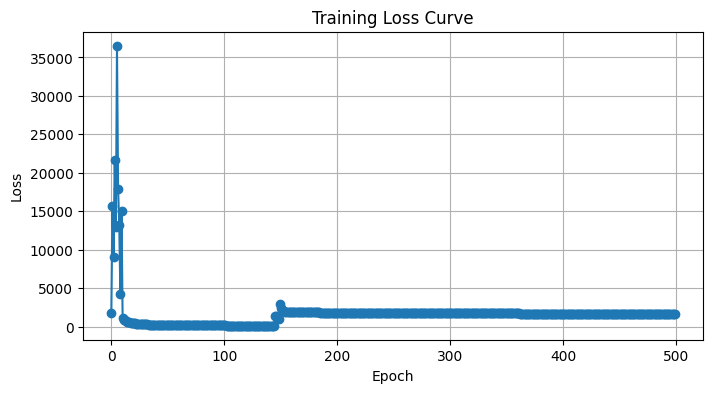

In [16]:
plt.figure(figsize=(8,4))
plt.plot(losses, marker='o')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

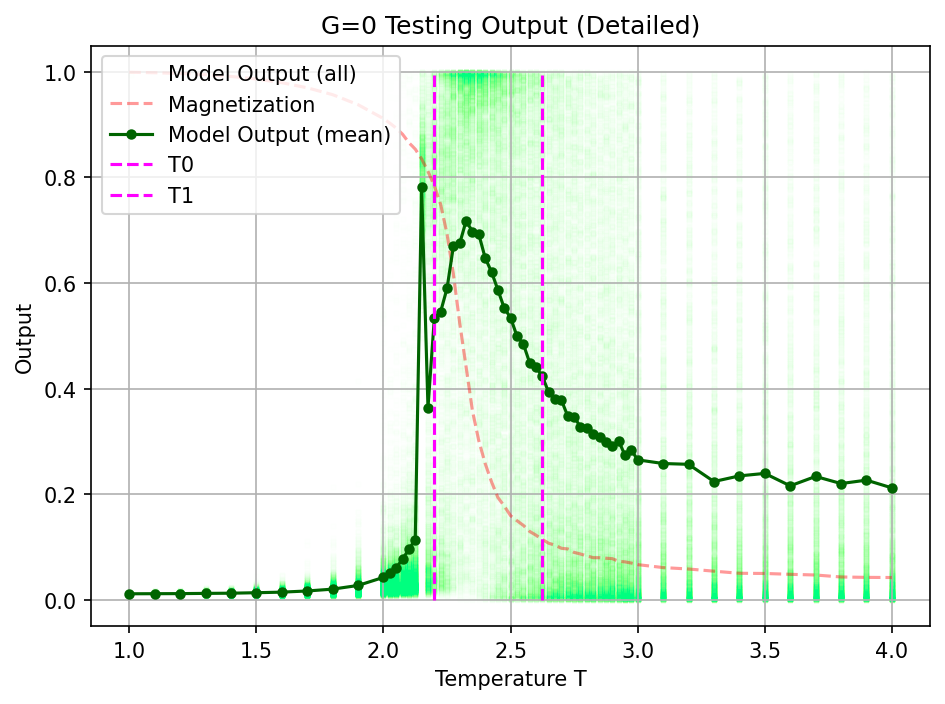

In [18]:
# G=0 Testing Output (inspired by dnn-ising-latest.ipynb)
import matplotlib.pyplot as plt
import numpy as np

# Reshape for plotting by temperature
outputs = outputs.reshape(61, 2000)
labels_validate = labels_validate.reshape(61, 2000)
Ts_G_0 = f5['Ts'][:]

mu = np.average(np.fabs(np.average(data_validate.reshape(61, 2000, 1600), axis=2)), axis=1)
Tsn = Ts_G_0[Targs]

plt.figure(dpi=150)
plt.scatter(np.repeat(Tsn, 2000), outputs.flatten(), alpha=0.002, s=8.0, color='springgreen', label='Model Output (all)')
plt.plot(Tsn, mu, 'r--', alpha=0.4, label='Magnetization')
plt.plot(Tsn, np.mean(outputs, axis=1), 'o-', markersize=4, color='darkgreen', label='Model Output (mean)')
T0, T1 = Tsn[np.where(labels_tmp == 1.0)[0][[0, -1]]]
plt.vlines(T0, 0, 1, color='magenta', linestyle='dashed', label='T0')
plt.vlines(T1, 0, 1, color='magenta', linestyle='dashed', label='T1')
plt.xlabel('Temperature T')
plt.ylabel('Output')
plt.title('G=0 Testing Output (Detailed)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()